In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

ImportError: No module named statsmodels.api

In [13]:
raw_data=pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [14]:
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV


In [15]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [16]:
data=raw_data.drop(['Model'],axis=1)
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [17]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [20]:
dat_no_mv=data.dropna(axis=0)

dat_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [18]:
dat_no_mv.head()

NameError: name 'dat_no_mv' is not defined

In [19]:
sns.distplot(dat_no_mv['Price'])

NameError: name 'sns' is not defined

In [8]:
q=dat_no_mv['Price'].quantile(0.99)
data_1=dat_no_mv[dat_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


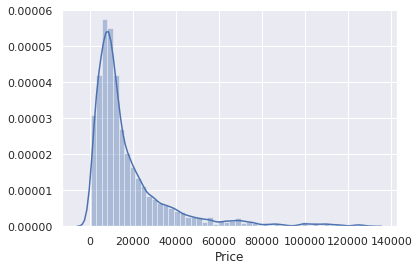

In [9]:
sns.distplot(data_1['Price'])

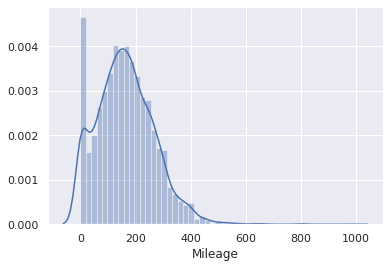

In [10]:
sns.distplot(dat_no_mv['Mileage'])

In [11]:
q=data_1['Mileage'].quantile(0.99)

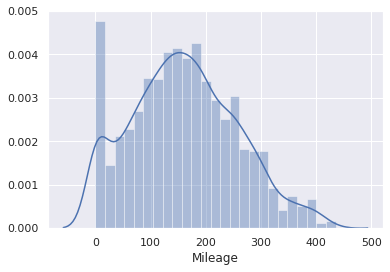

In [12]:
data_2=data_1[data_1['Mileage']<q]
sns.distplot(data_2['Mileage'])

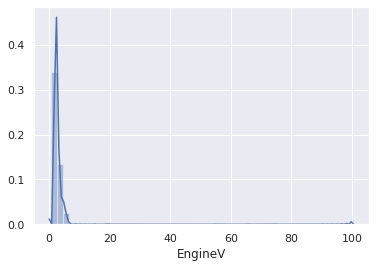

In [13]:
sns.distplot(dat_no_mv['EngineV'])

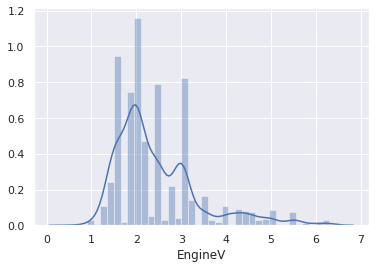

In [14]:

data_3=data_2[data_2['EngineV']<6.5]
sns.distplot(data_3['EngineV'])

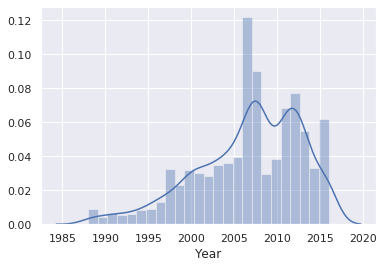

In [15]:
q=data_3['Year'].quantile(0.01)
data_4=data_3[data_3['Year']>q]
sns.distplot(data_4['Year'])

In [11]:
data_cleaned=data_4.reset_index(drop=True)
data_cleaned.describe(include='all')

NameError: name 'data_4' is not defined

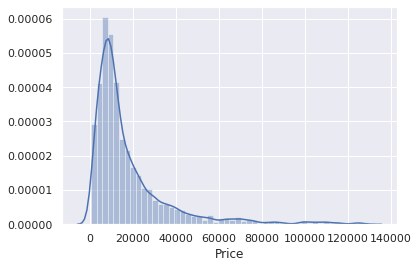

In [17]:
sns.distplot(data_cleaned['Price'])

In [9]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(16,4))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('price and year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('price and mileage')

plt.show()

NameError: name 'plt' is not defined

In [18]:
log_price=np.log(data_cleaned['Price'])
data_cleaned['log_price']=log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,9.814656
5,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,9.560997
6,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,9.287209
7,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,7.244228
8,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011,9.388487
9,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994,7.824046


In [10]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(16,4))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log price and year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('log price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('log price and mileage')

plt.show()

NameError: name 'plt' is not defined

In [20]:
data_cleaned=data_cleaned.drop(['Price'],axis=1)

In [21]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleaned[['Mileage','Year','EngineV']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["features"]=variables.columns

In [23]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [24]:
data_no_multicollinearity=data_cleaned.drop(['Year'],axis=1)

In [25]:
data_with_dummies=pd.get_dummies(data_no_multicollinearity,drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


 ### Rearrange

In [26]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [27]:
cols=['log_price','Mileage', 'EngineV',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [28]:
data_pre_pro=data_with_dummies[cols]
data_pre_pro.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Linear Regression

Declare targets and inputs

In [29]:
targets=data_pre_pro['log_price']

In [30]:
inputs=data_pre_pro.drop(['log_price'],axis=1)

Scale the data

In [31]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
inputs_scaled=scaler.transform(inputs)


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs_scaled,targets,test_size=0.2,random_state=365)

### Create regression

In [34]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
y_hat=reg.predict(x_train)

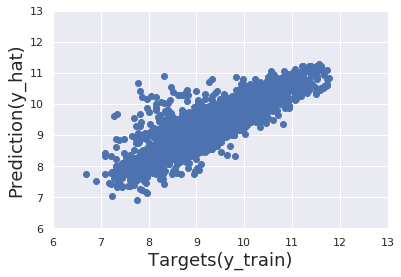

In [37]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets(y_train)',size=18)
plt.ylabel('Prediction(y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

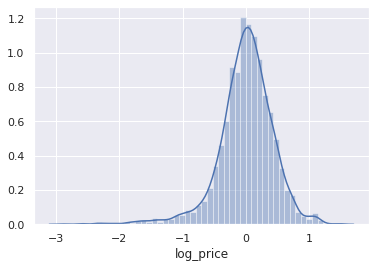

In [39]:
sns.distplot(y_train-y_hat)


In [40]:
reg.score(x_train,y_train)

0.744996578792662

In [41]:
reg.intercept_


9.415239458021299

In [42]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [43]:
y_hat_test=reg.predict(x_test)

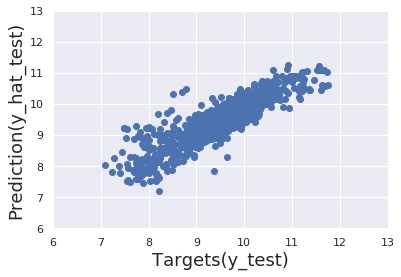

In [44]:
plt.scatter(y_test,y_hat_test)
plt.xlabel('Targets(y_test)',size=18)
plt.ylabel('Prediction(y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [45]:
df_pf=pd.DataFrame(np.exp(y_hat_test),columns=['Predictions'])
df_pf

,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075
5,21289.799394
6,20159.189144
7,20349.617702
8,11581.537864
9,33614.617349


In [46]:
 df_pf['Target']=np.exp(y_test)
    df_pf

IndentationError: unexpected indent (<ipython-input-46-d4fafac18aae>, line 2)

In [47]:
y_test

1192     7.740664
3360     7.937375
2350     7.824046
3257     8.764053
892      9.121509
2855     9.903488
167     10.568441
2995     9.740910
3768     9.433484
3304    10.621327
1095     9.457200
2107     8.517193
1        8.974618
758      9.740910
720      9.126959
3450     9.392579
917      9.928180
1160     9.179881
2286    10.594132
2173     9.705037
1617     9.629051
2005    10.106428
3548     8.639411
2108     9.464983
2546     9.947504
3123    10.373179
3607     8.188689
1100     9.358760
3579    10.691922
1901    10.657259
          ...    
1619     8.006368
905      8.389360
703      8.922658
1723     9.296518
3641    11.258033
3130     8.915969
1884     8.006368
1059     9.457200
2130     9.392662
2447     8.486734
705      9.836279
1146     9.758462
1110     7.863267
11       9.259131
2297     8.980927
1430     8.809863
948      9.104980
2631     8.987197
2950     9.472628
514      9.287301
1269     9.277999
128      9.190138
1822     9.792556
266      9.841612
914     11

In [49]:
y_test=y_test.reset_index(drop=True)

In [50]:
df_pf['Target']=np.exp(y_test)
df_pf

,Predictions,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
5,21289.799394,20000.0
6,20159.189144,38888.0
7,20349.617702,16999.0
8,11581.537864,12500.0
9,33614.617349,41000.0
